In [92]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import chisquare, chi2_contingency
import scipy.stats as stats
colors = ['#97C1A9','#FFFFFF']

warnings.filterwarnings('ignore')

<h1>DATA INFO</h1>

In [93]:
baseIndicadores = pd.read_csv('../data/diabetes_012_health_indicators_BRFSS2015.csv')
#data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
#data/diabetes_binary_health_indicators_BRFSS2015.csv
print(baseIndicadores['Diabetes_012'].value_counts())
print(baseIndicadores.columns)


Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64
Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [94]:
baseIndicadores.info()
print('Dimensiones del archivo')
print(baseIndicadores.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [95]:
baseIndicadores.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [96]:
baseIndicadores.isnull().sum().any()

False

<h1>EDA</h1>

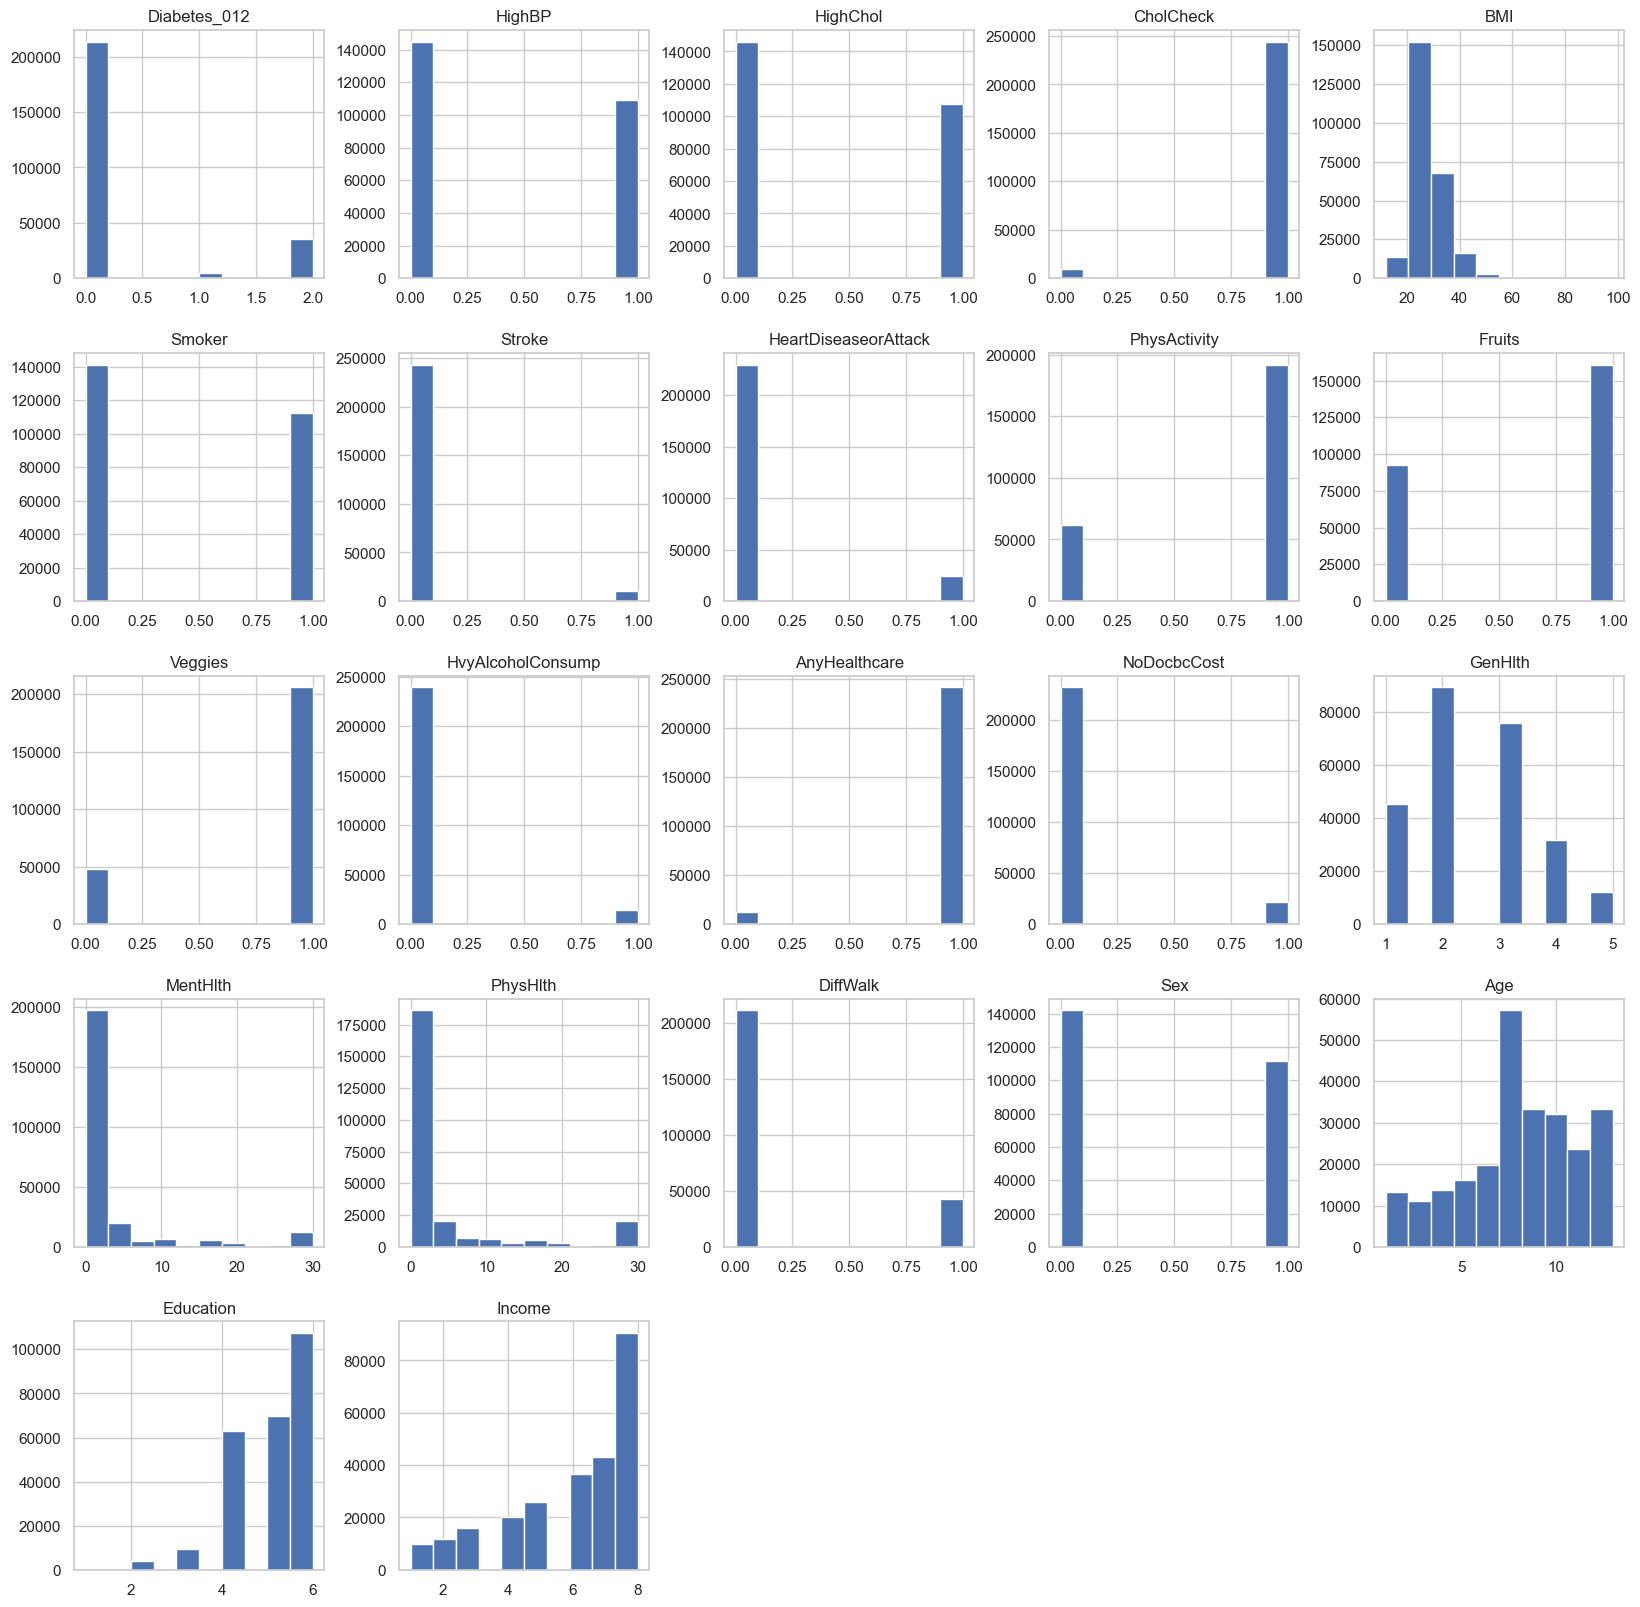

In [97]:
baseIndicadores.hist(figsize=(20,20));

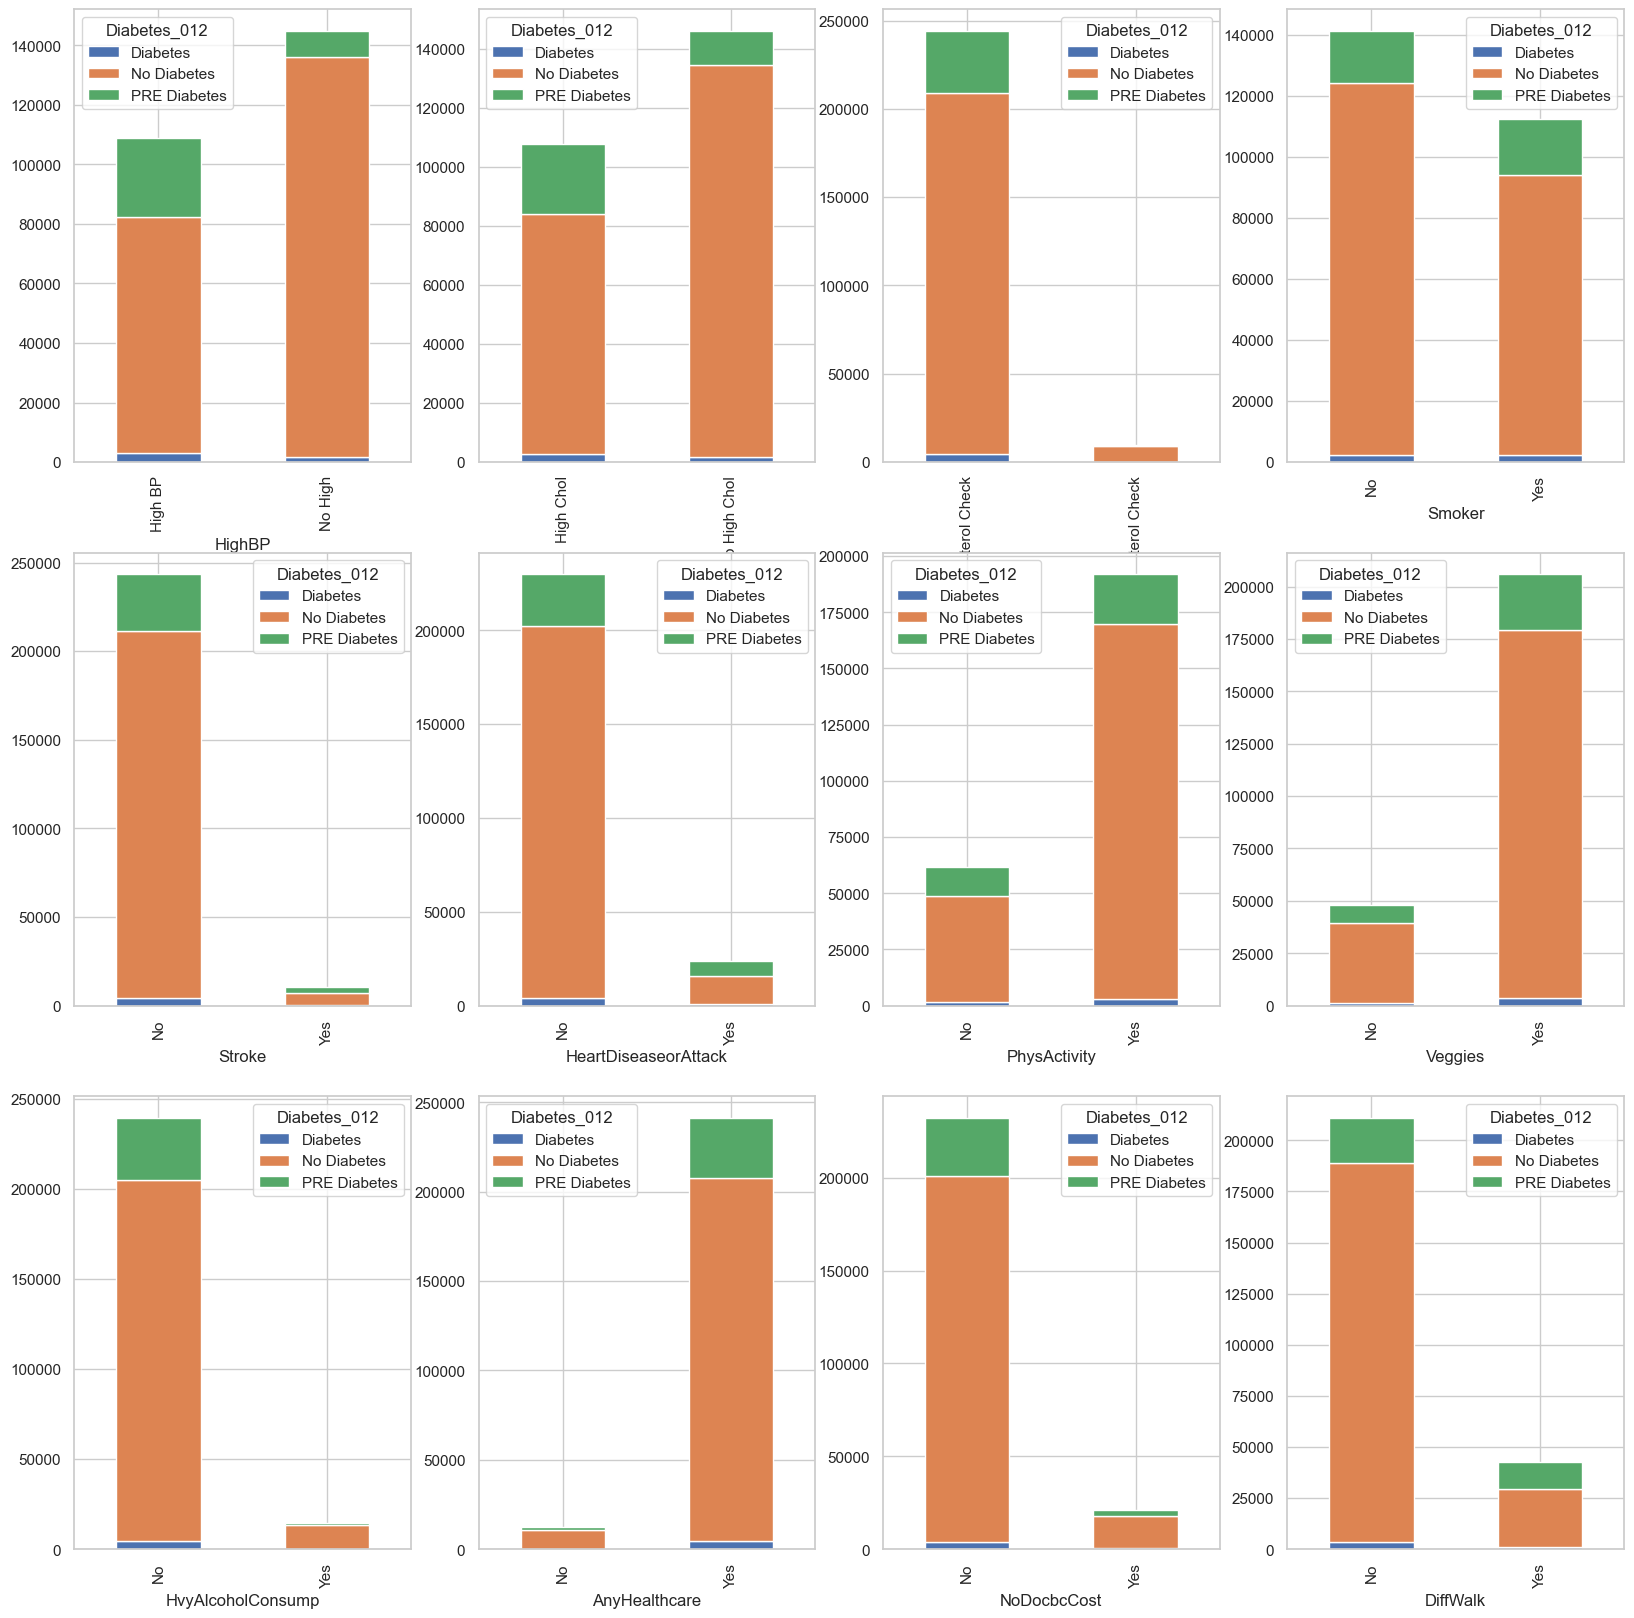

In [98]:


def create_plot_pivot(data2, x_column):
    _df_plot = data2.groupby([x_column, 'Diabetes_012']).size() \
    .reset_index().pivot(columns='Diabetes_012', index=x_column, values=0)
    return _df_plot

fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()
data2 = baseIndicadores.copy()

data2.Age[data2['Age'] == 1] = '18 to 24'
data2.Age[data2['Age'] == 2] = '25 to 29'
data2.Age[data2['Age'] == 3] = '30 to 34'
data2.Age[data2['Age'] == 4] = '35 to 39'
data2.Age[data2['Age'] == 5] = '40 to 44'
data2.Age[data2['Age'] == 6] = '45 to 49'
data2.Age[data2['Age'] == 7] = '50 to 54'
data2.Age[data2['Age'] == 8] = '55 to 59'
data2.Age[data2['Age'] == 9] = '60 to 64'
data2.Age[data2['Age'] == 10] = '65 to 69'
data2.Age[data2['Age'] == 11] = '70 to 74'
data2.Age[data2['Age'] == 12] = '75 to 79'
data2.Age[data2['Age'] == 13] = '80 or older'

data2.Diabetes_012[data2['Diabetes_012'] == 0] = 'No Diabetes'
data2.Diabetes_012[data2['Diabetes_012'] == 1] = 'Diabetes'
data2.Diabetes_012[data2['Diabetes_012'] == 2] = 'PRE Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'No High'
data2.HighBP[data2['HighBP'] == 1] = 'High BP'

data2.HighChol[data2['HighChol'] == 0] = 'No High Chol'
data2.HighChol[data2['HighChol'] == 1] = 'High Chol'

data2.CholCheck[data2['CholCheck'] == 0] = 'No Cholesterol Check'
data2.CholCheck[data2['CholCheck'] == 1] = 'Cholesterol Check'

data2.Smoker[data2['Smoker'] == 0] = 'No'
data2.Smoker[data2['Smoker'] == 1] = 'Yes'

data2.Stroke[data2['Stroke'] == 0] = 'No'
data2.Stroke[data2['Stroke'] == 1] = 'Yes'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Yes'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'No'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Yes'

data2.Fruits[data2['Fruits'] == 0] = 'No'
data2.Fruits[data2['Fruits'] == 1] = 'Yes'

data2.Veggies[data2['Veggies'] == 0] = 'No'
data2.Veggies[data2['Veggies'] == 1] = 'Yes'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'No'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Yes'

data2.AnyHealthcare[data2['AnyHealthcare'] == 0] = 'No'
data2.AnyHealthcare[data2['AnyHealthcare'] == 1] = 'Yes'

data2.NoDocbcCost[data2['NoDocbcCost'] == 0] = 'No'
data2.NoDocbcCost[data2['NoDocbcCost'] == 1] = 'Yes'

data2.GenHlth[data2['GenHlth'] == 5] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 4] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 2] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 1] = 'Poor'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'No'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Yes'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = '< $10,000'
data2.Income[data2['Income'] == 2] = '< $10,000'
data2.Income[data2['Income'] == 3] = '< $10,000'
data2.Income[data2['Income'] == 4] = '< $10,000'
data2.Income[data2['Income'] == 5] = '< $35,000'
data2.Income[data2['Income'] == 6] = '< $35,000'
data2.Income[data2['Income'] == 7] = '< $35,000'
data2.Income[data2['Income'] == 8] = '$75,000 or More'

cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']
c = len(cols)

for i in range(c):
    create_plot_pivot(data2, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()

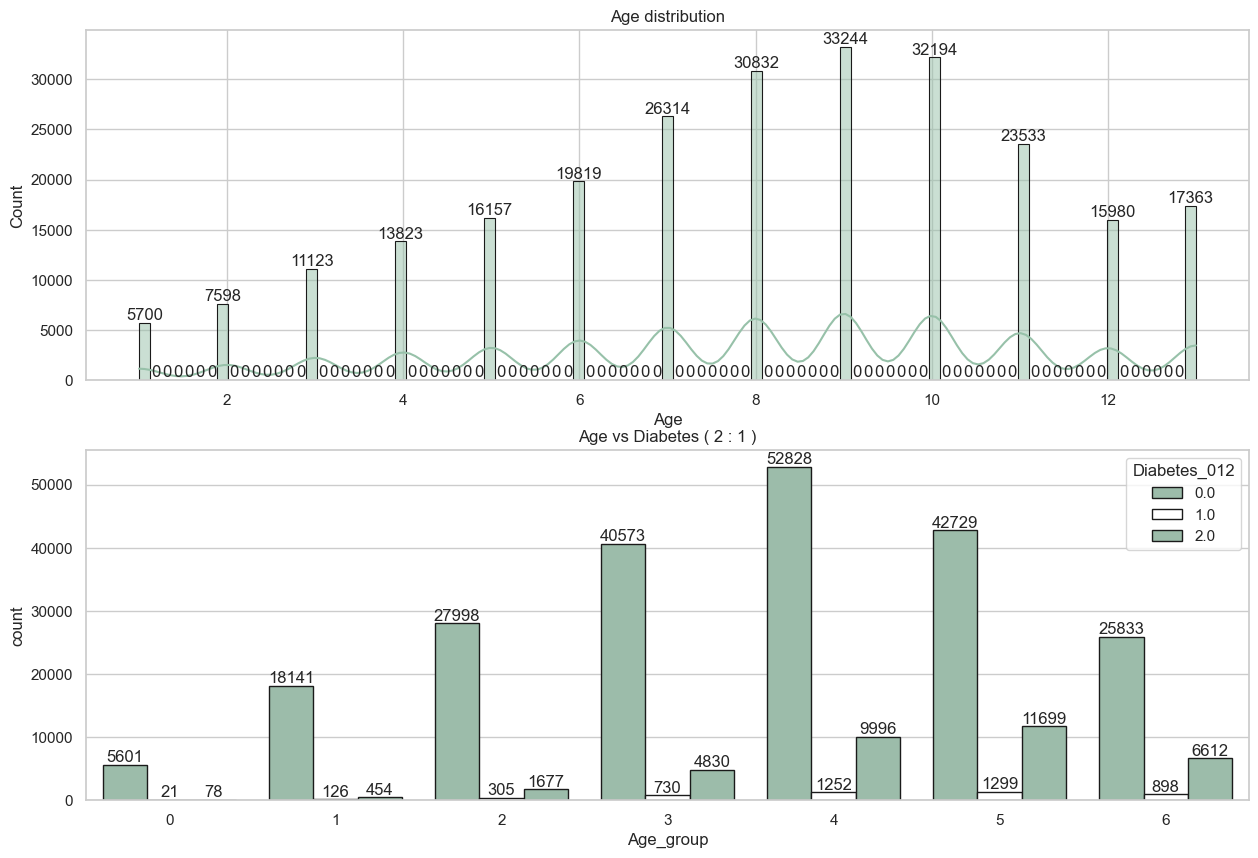

In [99]:
#Numerical Plot
def numplot(df,x,scale): 
   sns.set(style='whitegrid')
   fig = plt.subplots(2,1,figsize = (15,10))
   plt.subplot(2,1,1)
   ax = sns.histplot(data=df, x=x, kde=True,color=colors[0],edgecolor = 'k')
   ax.bar_label(ax.containers[0])
   tit=x + ' distribution'
   plt.title(tit)
   plt.subplot(2,1,2)
   tar=x + '_group'
   Tstr= str(scale)
   tit2=x + ' vs Diabetes ( ' + Tstr + ' : 1 )'
   df[tar] = [ int(i / scale) for i in df[x]]
   ax=sns.countplot(data=df, x=tar, hue='Diabetes_012',palette = colors,edgecolor = 'k')
   for container in ax.containers:
     ax.bar_label(container)
   plt.title(tit2)

numplot(baseIndicadores,'Age',2)

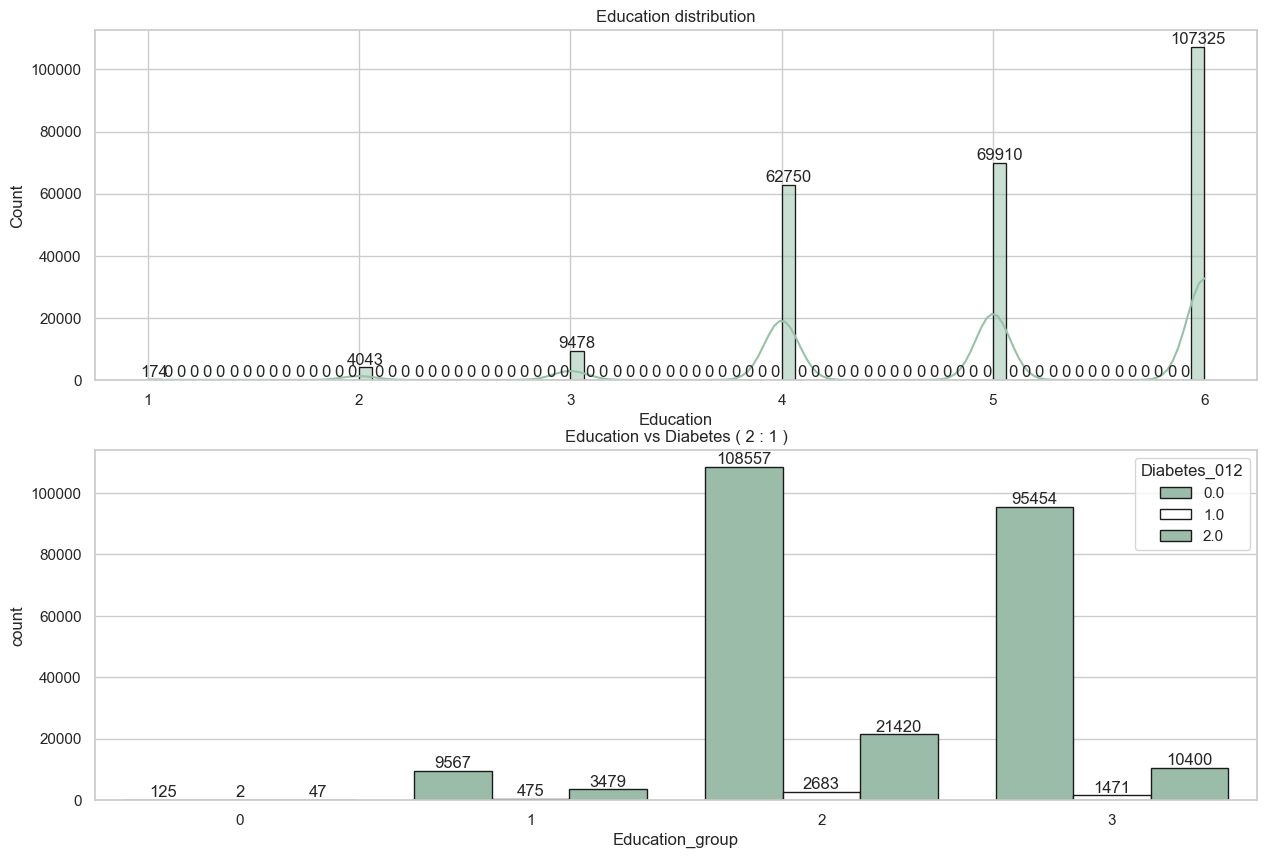

In [100]:
numplot(baseIndicadores,'Education',2)

<h1>Features Engineering</h1>

Duplicate rows :  23899


<Axes: >

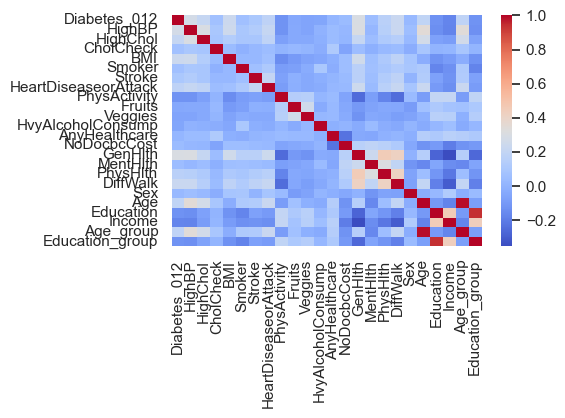

In [101]:
duplicate = baseIndicadores[baseIndicadores.duplicated()]
print("Duplicate rows : ",len(duplicate))

porrep_corr = baseIndicadores.corr(method='spearman', numeric_only=True)
sns.heatmap(porrep_corr, xticklabels=porrep_corr.columns,yticklabels=porrep_corr.columns,cmap='coolwarm')

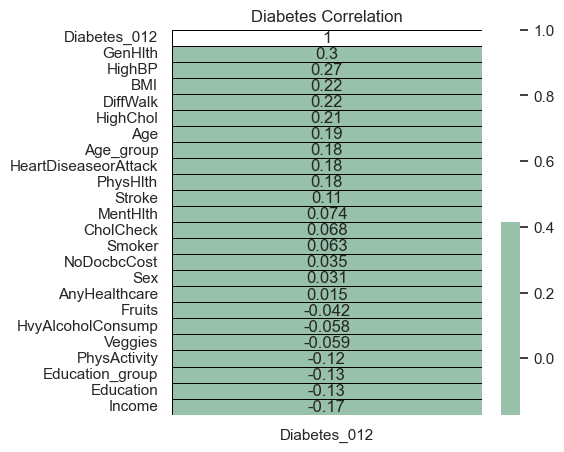

In [102]:
corr = baseIndicadores.corrwith(baseIndicadores['Diabetes_012']).sort_values(ascending = False).to_frame()
corr.columns = ['Diabetes_012']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Diabetes Correlation');

Hipotesis a validar:

H0 - Si se rechaza la hipotesis de independencia, entonces existe relación directa entre las variables.

H1 - Si se comprueba la hipotesis, entonces las variables son independientes.

Esto se comprueba si p-value < 0.05, entonces se rechaza la hipotesis.

In [103]:
def chi_check(data, var1, var2, significance_level=None):
  tab_class = pd.crosstab(data[var1], data[var2], margins=True)
  tab_values = np.array([tab_class.iloc[0].values,
                  tab_class.iloc[1].values])
  stat, p, dof, expected_value= chi2_contingency(tab_values)
  print("p value: " + str(p)) 
  if p <= significance_level: 
    print('Rechaza Hipotesis nula') 
  else:
    print('Acepta hipotesis')

In [104]:
print('Relación entre colesterol y Diabetes')
chi_check(baseIndicadores, 'HighChol', 'Diabetes_012', significance_level=0.05)
print('Relación entre presión arterial y Diabetes')
chi_check(baseIndicadores, 'HighBP', 'Diabetes_012', significance_level=0.05)
print('Relación entre Diabetes y Fumadores')
chi_check(baseIndicadores, 'Diabetes_012', 'Smoker', significance_level=0.05)

Relación entre colesterol y Diabetes
p value: 0.0
Rechaza Hipotesis nula
Relación entre presión arterial y Diabetes
p value: 0.0
Rechaza Hipotesis nula
Relación entre Diabetes y Fumadores
p value: 1.0641792979162048e-16
Rechaza Hipotesis nula


In [105]:
# Datos de ejemplo del IMC para no diabéticos
sin_actividad_fisica = baseIndicadores[baseIndicadores['Diabetes_012']==0]['PhysHlth']
# Datos de ejemplo del IMC para diabéticos
con_actividad_fisica = baseIndicadores[baseIndicadores['Diabetes_012']==1]['PhysHlth']

# Realizar la prueba t de dos muestras independientes
t_statistic, p_value = stats.ttest_ind(sin_actividad_fisica, con_actividad_fisica)

# Imprimir los resultados
print("Prueba t de dos muestras independientes:")
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)
print('p es menor que el nivel de significancia 0.05, podemos rechazar la hipótesis nula y concluir que hay una diferencia significativa en la actividad física y los no diabéticos y los diabéticos.')

Prueba t de dos muestras independientes:
Estadístico t: -23.118725339020884
Valor p: 4.16535068162288e-118
p es menor que el nivel de significancia 0.05, podemos rechazar la hipótesis nula y concluir que hay una diferencia significativa en la actividad física y los no diabéticos y los diabéticos.


In [106]:
# Datos de ejemplo del IMC para no diabéticos
no_diabetic_imc = baseIndicadores[baseIndicadores['Diabetes_012']==0]['BMI']
# Datos de ejemplo del IMC para diabéticos
diabetic_imc = baseIndicadores[baseIndicadores['Diabetes_012']==1]['BMI']

# Realizar la prueba t de dos muestras independientes
t_statistic, p_value = stats.ttest_ind(no_diabetic_imc, diabetic_imc)

# Imprimir los resultados
print("Prueba t de dos muestras independientes:")
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)
print('p es menor que el nivel de significancia 0.05, ')
print('podemos rechazar la hipótesis nula y concluir que hay una diferencia significativa en los IMC entre los no diabéticos y los diabéticos.')

Prueba t de dos muestras independientes:
Estadístico t: -31.985078927309395
Valor p: 5.820712052672346e-224
p es menor que el nivel de significancia 0.05, 
podemos rechazar la hipótesis nula y concluir que hay una diferencia significativa en los IMC entre los no diabéticos y los diabéticos.


Todas las variables no se aprecian correlacionadas con Diabetes salvo GenHlth.

<h1>Modelo Predictivo</h1>

In [107]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.feature_selection import SelectKBest,chi2

In [116]:
#Para el modelo predictivo cambiamos los datos a los balanceados
baseIndicadores = pd.read_csv('../data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

70692

In [109]:
#apply SelectKBest class to extract top 10 best features
BestFeatures = SelectKBest(score_func=chi2, k='all')
X= baseIndicadores.iloc[:,1:]
Y= baseIndicadores.iloc[:,0]
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']
print(f_Scores.nlargest(16,'Score'))

                 Feature         Score
15              PhysHlth  55929.053254
3                    BMI  10312.875795
14              MentHlth   9491.555258
18                   Age   5204.869946
13               GenHlth   5133.529630
0                 HighBP   4491.799960
16              DiffWalk   3926.865331
20                Income   2956.984221
1               HighChol   2804.501278
6   HeartDiseaseorAttack   2695.401378
5                 Stroke   1042.976337
10     HvyAlcoholConsump    608.852980
7           PhysActivity    528.494034
19             Education    442.144248
4                 Smoker    274.340616
12           NoDocbcCost    107.550083


In [110]:
baseIndicadores = baseIndicadores[['Diabetes_binary','PhysHlth','BMI','MentHlth','Age','GenHlth'
                                   ,'HighBP','DiffWalk','Income','HighChol','HeartDiseaseorAttack','Stroke'
                                   ,'HvyAlcoholConsump','PhysActivity','Education','Smoker','NoDocbcCost']]

t1 = baseIndicadores['Diabetes_binary'].values
baseIndicadores = baseIndicadores.drop(['Diabetes_binary'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(baseIndicadores, t1 , test_size=0.33, random_state=42)

print(baseIndicadores.columns)
def model(classifier,x_train,y_train,x_test,y_test):
   sns.set(rc={'figure.figsize':(5,3)})
   sns.set(style='whitegrid')
   classifier.fit(x_train,y_train)
   prediction = classifier.predict(x_test)
   cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
   print(cross_val_score(classifier,x_train,y_train,cv=3))
   #print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv=3)))
   print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
   RocCurveDisplay.from_estimator(classifier, x_test,y_test)
   #metrics.plot_roc_curve(classifier, x_test,y_test)
   plt.title('ROC_AUC_Plot')
   plt.show()

def model_evaluation(classifier,x_test,y_test): 
 # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

Index(['PhysHlth', 'BMI', 'MentHlth', 'Age', 'GenHlth', 'HighBP', 'DiffWalk',
       'Income', 'HighChol', 'HeartDiseaseorAttack', 'Stroke',
       'HvyAlcoholConsump', 'PhysActivity', 'Education', 'Smoker',
       'NoDocbcCost'],
      dtype='object')


<h3>XGBClassifier</h3>

[0.73809222 0.74233595 0.74054602]
ROC_AUC Score :  74.74%


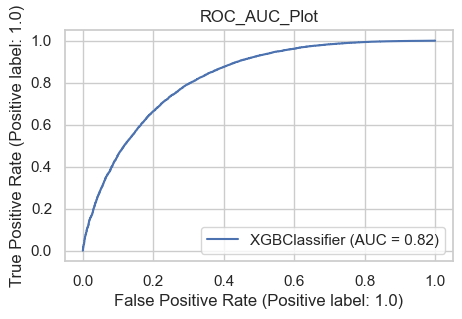

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     11651
         1.0       0.73      0.78      0.76     11678

    accuracy                           0.75     23329
   macro avg       0.75      0.75      0.75     23329
weighted avg       0.75      0.75      0.75     23329



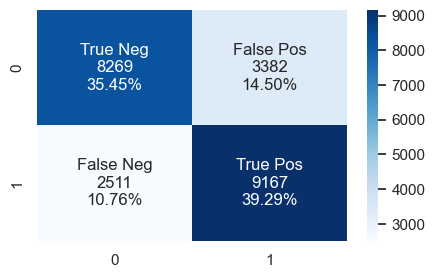

In [111]:
classifier_xgb = XGBClassifier(random_state=1)
model(classifier_xgb,X_train,y_train,X_test,y_test)
model_evaluation(classifier_xgb,X_test,y_test)

<h3>LGBMClassifier</h3>

[0.7479098  0.74866988 0.74909736]
ROC_AUC Score :  75.28%


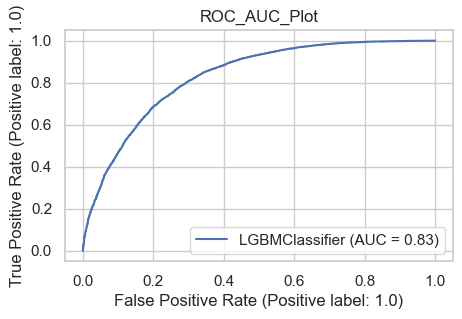

              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74     11651
         1.0       0.73      0.80      0.76     11678

    accuracy                           0.75     23329
   macro avg       0.75      0.75      0.75     23329
weighted avg       0.75      0.75      0.75     23329



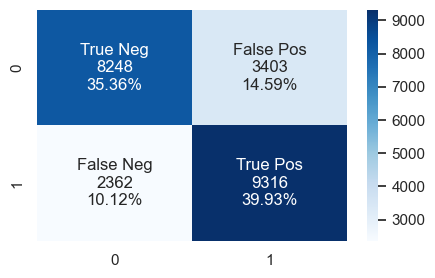

In [112]:
classifier_lgbm = LGBMClassifier(random_state=1)
model(classifier_lgbm,X_train,y_train,X_test,y_test)
model_evaluation(classifier_lgbm,X_test,y_test)

<h3>LogisticRegression</h3>

[0.74277933 0.74866988 0.74136948]
ROC_AUC Score :  74.66%


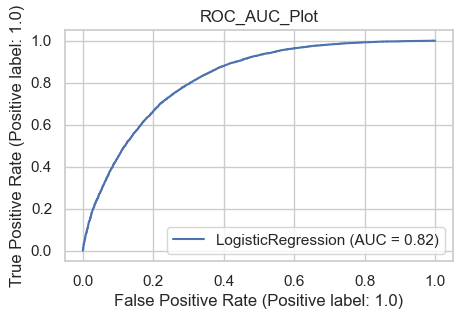

              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74     11651
         1.0       0.74      0.77      0.75     11678

    accuracy                           0.75     23329
   macro avg       0.75      0.75      0.75     23329
weighted avg       0.75      0.75      0.75     23329



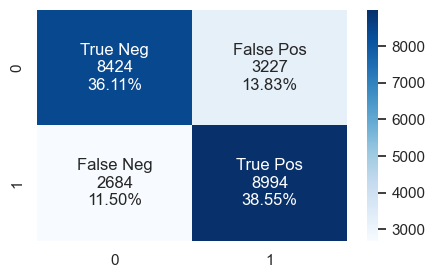

In [113]:
classifier_lr = LogisticRegression(random_state = 1) 
model(classifier_lr,X_train,y_train,X_test,y_test)
model_evaluation(classifier_lr,X_test,y_test)

<h3>GradientBoostingClassifier</h3>

[0.74752977 0.75069673 0.74903402]
ROC_AUC Score :  75.26%


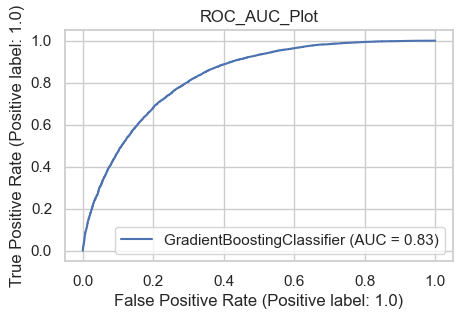

              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74     11651
         1.0       0.73      0.80      0.76     11678

    accuracy                           0.75     23329
   macro avg       0.75      0.75      0.75     23329
weighted avg       0.75      0.75      0.75     23329



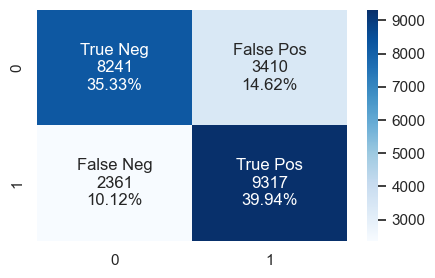

In [114]:
classifier_grad = GradientBoostingClassifier(random_state=1)
model(classifier_grad,X_train,y_train,X_test,y_test)
model_evaluation(classifier_grad,X_test,y_test)

<h3>RandomForestClassifier</h3>

[0.73017482 0.72460096 0.72553367]
ROC_AUC Score :  73.05%


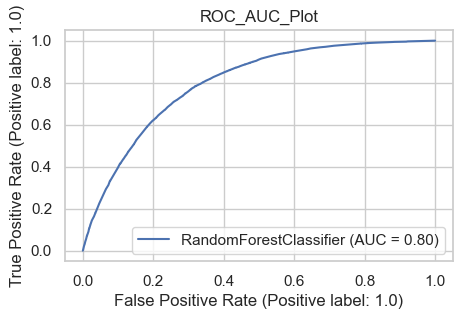

              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72     11651
         1.0       0.72      0.77      0.74     11678

    accuracy                           0.73     23329
   macro avg       0.73      0.73      0.73     23329
weighted avg       0.73      0.73      0.73     23329



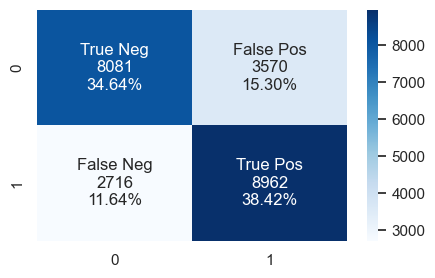

In [115]:
classifier_rdf = RandomForestClassifier(random_state=1)
model(classifier_rdf,X_train,y_train,X_test,y_test)
model_evaluation(classifier_rdf,X_test,y_test)